Understanding weirdness in the realtime data at the trip level
* One ping in a trip 
* Too many pings in a trip 
* Are pings actually 5 min apart for all trips 
* Pings number at least X% of bus stops of route 

In [1]:
import pandas as pd
import geopandas as gpd
import os
import re
import matplotlib.pyplot as plt
#df = pd.read_parquet("out/2023_cta_bus_full_day_data_v2.parquet")

In [3]:
df_small = df[['data_time','pid', 'rt','unique_trip_vehicle_day']]
df_small['data_time'] = pd.to_datetime(df_small['data_time'])
df_small['id'] = df.index

/var/folders/vk/_03tl7qs1sv80_pgkhd8bxch0000gn/T/ipykernel_5875/2156418153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['data_time'] = pd.to_datetime(df_small['data_time'])
/var/folders/vk/_03tl7qs1sv80_pgkhd8bxch0000gn/T/ipykernel_5875/2156418153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['id'] = df.index


In [4]:
df_small.head()

,data_time,pid,rt,unique_trip_vehicle_day,id
0,2023-01-01 00:02:00,18414.0,3,318414.023535943915371779862023-01-01,0
1,2023-01-01 00:02:00,18415.0,3,318415.0235359447105175112662023-01-01,1
2,2023-01-01 00:02:00,18415.0,3,318415.0235356834105174779612023-01-01,2
3,2023-01-01 00:02:00,19380.0,4,419380.0235359595108842613282023-01-01,3
4,2023-01-01 00:02:00,19380.0,4,419380.0235360013108842513182023-01-01,4


In [ ]:
# are all pings 5 min apart

In [63]:
one_trip = df_small[df_small['unique_trip_vehicle_day'] == '318414.023535943915371779862023-01-01']
one_trip

,data_time,pid,rt,unique_trip_vehicle_day,id
0,2023-01-01 00:02:00,18414.0,3,318414.023535943915371779862023-01-01,0
179,2023-01-01 00:07:00,18414.0,3,318414.023535943915371779862023-01-01,179
351,2023-01-01 00:12:00,18414.0,3,318414.023535943915371779862023-01-01,351
513,2023-01-01 00:17:00,18414.0,3,318414.023535943915371779862023-01-01,513
673,2023-01-01 00:22:00,18414.0,3,318414.023535943915371779862023-01-01,673


In [18]:
one_pattern = df_small[df_small['pid'] == 95]
one_pattern

,data_time,pid,rt,unique_trip_vehicle_day,id
6970,2023-01-01 05:57:00,95.0,72,7295.0235318404101004820292023-01-01,6970
7160,2023-01-01 06:02:00,95.0,72,7295.0235318404101004820292023-01-01,7160
7357,2023-01-01 06:07:00,95.0,72,7295.0235318404101004820292023-01-01,7357
7557,2023-01-01 06:12:00,95.0,72,7295.0235318404101004820292023-01-01,7557
7764,2023-01-01 06:17:00,95.0,72,7295.0235318404101004820292023-01-01,7764
...,...,...,...,...,...
55172872,2023-12-31 23:52:00,95.0,72,7295.0252003911101011285042023-12-31,55172872
55172873,2023-12-31 23:52:00,95.0,72,7295.0252003915101011181602023-12-31,55172873
55172874,2023-12-31 23:51:00,95.0,72,7295.0252003908101010984142023-12-31,55172874
55173080,2023-12-31 23:57:00,95.0,72,7295.0252003911101011285042023-12-31,55173080


In [9]:
trip_intervals = []
for i in range(1,len(one_trip)):
    trip_intervals.append(one_trip.iloc[i]['data_time'] - one_trip.iloc[i-1]['data_time'])

In [34]:
# find every trip for a pattern where the pings are not 5 min apart



,data_time,pid,rt,unique_trip_vehicle_day,id
6970,2023-01-01 05:57:00,95.0,72,7295.0235318404101004820292023-01-01,6970
7160,2023-01-01 06:02:00,95.0,72,7295.0235318404101004820292023-01-01,7160
7357,2023-01-01 06:07:00,95.0,72,7295.0235318404101004820292023-01-01,7357
7557,2023-01-01 06:12:00,95.0,72,7295.0235318404101004820292023-01-01,7557
7764,2023-01-01 06:17:00,95.0,72,7295.0235318404101004820292023-01-01,7764
...,...,...,...,...,...
55172872,2023-12-31 23:52:00,95.0,72,7295.0252003911101011285042023-12-31,55172872
55172873,2023-12-31 23:52:00,95.0,72,7295.0252003915101011181602023-12-31,55172873
55172874,2023-12-31 23:51:00,95.0,72,7295.0252003908101010984142023-12-31,55172874
55173080,2023-12-31 23:57:00,95.0,72,7295.0252003911101011285042023-12-31,55173080


In [66]:
one_trip['data_time'].diff().dt.total_seconds().mean()

300.0

In [76]:
one_pattern_edit.groupby('unique_trip_vehicle_day').apply(lambda x: x['data_time'].diff().dt.total_seconds().mean())

/var/folders/vk/_03tl7qs1sv80_pgkhd8bxch0000gn/T/ipykernel_5875/1247285371.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  one_pattern_edit.groupby('unique_trip_vehicle_day').apply(lambda x: x['data_time'].diff().dt.total_seconds().mean())


unique_trip_vehicle_day
7295.0235314066107561419402023-01-04    300.000000
7295.0235314066107561419402023-01-05    300.000000
7295.0235314066107561481552023-01-03    300.000000
7295.0235314066107561481552023-01-04    300.000000
7295.0235314066107561481632023-01-06    300.000000
                                           ...    
7295.0252003915101011119292023-12-25    300.000000
7295.0252003915101011119292023-12-26    300.000000
7295.0252003915101011119492023-12-24    266.666667
7295.0252003915101011119492023-12-25    300.000000
7295.0252003915101011181602023-12-31    300.000000
Length: 24516, dtype: float64

In [ ]:
one_pattern = df_small[df_small['pid'] == 95]

In [80]:
def avg_time_between_pings_one_pattern(pid:int):
    one_pattern = df_small[df_small['pid'] == pid]
    #remove trips that only have 1 ping
    one_pattern_edit = one_pattern.groupby('unique_trip_vehicle_day').filter(lambda x: len(x) != 1)

    #one_pattern_edit.groupby('unique_trip_vehicle_day').apply(lambda x: x['data_time'].diff().dt.total_seconds().mean())
    trip_avg_list = []
    i = 0
    for row, (trip_id, trip_df) in enumerate(one_pattern_edit.groupby('unique_trip_vehicle_day')):
        # average time between pings
        avg_gap = trip_df['data_time'].diff().dt.total_seconds().mean()
        trip_avg_list.append({'trip_id': trip_id, 'avg_time': avg_gap})

    return pd.DataFrame(trip_avg_list)

In [81]:
def avg_time_between_pings_all_patterns():
    for pid in df_small['pid'].unique():
        print(pid)
        print(avg_time_between_pings_one_pattern(pid))

,trip_id,avg_time
0,7295.0235314066107561419402023-01-04,300.000000
1,7295.0235314066107561419402023-01-05,300.000000
2,7295.0235314066107561481552023-01-03,300.000000
3,7295.0235314066107561481552023-01-04,300.000000
4,7295.0235314066107561481632023-01-06,300.000000
...,...,...
24511,7295.0252003915101011119292023-12-25,300.000000
24512,7295.0252003915101011119292023-12-26,300.000000
24513,7295.0252003915101011119492023-12-24,266.666667
24514,7295.0252003915101011119492023-12-25,300.000000


In [83]:
len(trip_avg_df[trip_avg_df["avg_time"] != 300].index) / len(trip_avg_df.index)

0.13966389296785772

<Axes: >

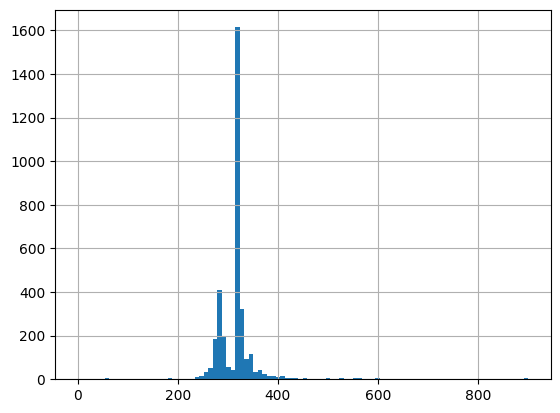

In [91]:
trip_avg_df[(trip_avg_df["avg_time"] != 300) & (trip_avg_df["avg_time"] < 1000)]["avg_time"].hist(bins=100)  

In [88]:
trip_avg_df[(trip_avg_df["avg_time"] != 300) & (trip_avg_df["avg_time"] < 1000)]["avg_time"].describe()

count    3414.000000
mean      318.532985
std        52.652100
min         0.000000
25%       295.714286
50%       320.000000
75%       323.076923
max       900.000000
Name: avg_time, dtype: float64

In [61]:
test

data_time    302.580641
dtype: float64

In [12]:
trip_intervals.sum()

AttributeError: 'list' object has no attribute 'sum'

In [6]:
trip_intervals = []
for i in range(1,len(df)):
    trip_intervals.append(df.iloc[i]['data_time'] - df.iloc[i-1]['data_time'])

dict = {'unique_trip_vehicle_day': unique_trip_vehicle_day, 'avg_interval': trip_intervals.mean()}

,data_time,pid,rt,unique_trip_vehicle_day,id
0,2023-01-01 00:02:00,18414.0,3,318414.023535943915371779862023-01-01,0
179,2023-01-01 00:07:00,18414.0,3,318414.023535943915371779862023-01-01,179
351,2023-01-01 00:12:00,18414.0,3,318414.023535943915371779862023-01-01,351
513,2023-01-01 00:17:00,18414.0,3,318414.023535943915371779862023-01-01,513
673,2023-01-01 00:22:00,18414.0,3,318414.023535943915371779862023-01-01,673


In [5]:
# on avg how many pings per trip per pattern
ping_per_pattern = df_small.groupby(['rt',"pid","unique_trip_vehicle_day"]).size().reset_index().groupby(['rt',"pid"])[0].agg(['count','mean']).reset_index() 


In [11]:
# ping_per_pattern.rename(columns={0: 'ping_count', 1 = 'ping_,mean}, inplace=True)
ping_per_pattern
ping_per_pattern['pid'] = ping_per_pattern['pid'].astype(int)

In [12]:
ping_per_pattern[ping_per_pattern['mean'] <= 2]

,rt,pid,count,mean
191,18,941,2852,1.857293
234,21,5019,975,1.903590
237,21,7534,336,1.982143
238,21,14129,4,2.000000
290,30,7901,1374,1.840611
299,31,8124,214,1.915888
350,44,1144,2547,1.528465
351,44,1145,3085,1.613290
362,48,1166,1211,1.734930
363,48,1168,1607,1.298693


In [ ]:
# avg time between each ping for each trip

# total time for each trip divided by pings
# 
#  

In [26]:
# stops per pattern
#cta-stop-watch/cta-stop-etl/out/patterns/pid_{pid}_stop.parquet



# stops_df = pd.read_parquet("out/patterns/pid_95_stop.parquet")
# stops = stops_df[stops_df['typ'] == "S"].size
# dict = {'pid': pid, 'stops': stops}


PID_DIR = "/Users/austinsteinhart/Desktop/CAPP/cta-stop-watch/cta-stop-watch/cta-stop-etl/out/patterns"
pids = []
for pid_file in os.listdir(PID_DIR):
    numbers = re.findall(r'\d+', pid_file)
    pid = numbers[0]
    pids.append(pid)

pids = set(pids)

all_pids = []
for pid in pids:
    #print(pid)
    stops_df = pd.read_parquet(f"out/patterns/pid_{pid}_stop.parquet")
    stops = len(stops_df[stops_df['typ'] == "S"].index)
    dict = {'pid': pid, 'stops': stops}
    all_pids.append(dict)

all_pids_df = pd.DataFrame(all_pids)


In [27]:
all_pids_df

,pid,stops
0,3463,44
1,7098,23
2,7735,53
3,5528,43
4,940,16
...,...,...
825,8142,137
826,8418,60
827,6586,46
828,8123,64


In [28]:
all_pids_df['pid'] = all_pids_df['pid'].astype(int)
ping_per_pattern_edit = ping_per_pattern.merge(all_pids_df, on='pid', how='left')

In [29]:
ping_per_pattern_edit[ping_per_pattern_edit['mean'] <= 2]

,rt,pid,count,mean,stops
191,18,941,2852,1.857293,16.0
234,21,5019,975,1.903590,13.0
237,21,7534,336,1.982143,19.0
238,21,14129,4,2.000000,18.0
290,30,7901,1374,1.840611,13.0
299,31,8124,214,1.915888,12.0
350,44,1144,2547,1.528465,14.0
351,44,1145,3085,1.613290,14.0
362,48,1166,1211,1.734930,13.0
363,48,1168,1607,1.298693,13.0


In [35]:
ping_per_pattern_edit.mean

0      35.0
1      31.0
2      33.0
3      19.0
4      21.0
       ... 
901    32.0
902    38.0
903    38.0
904    32.0
905     NaN
Name: stops, Length: 906, dtype: float64

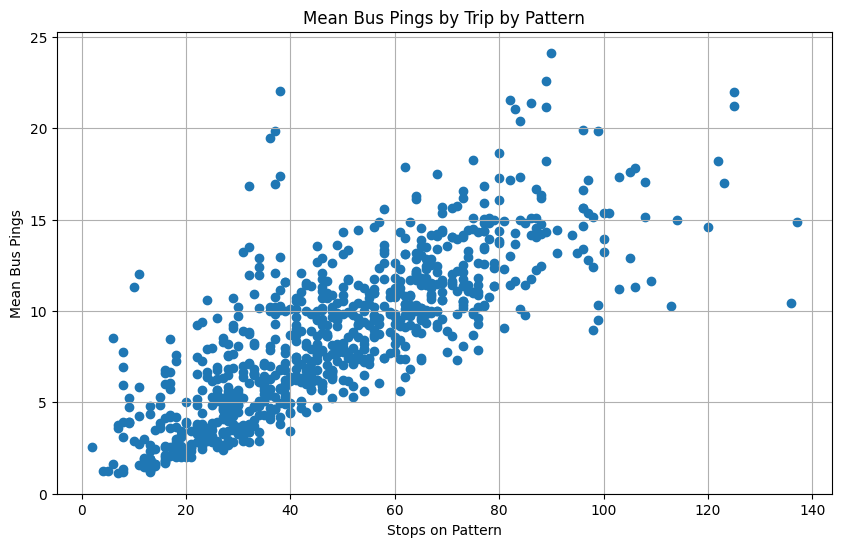

In [40]:
df = ping_per_pattern_edit



plt.figure(figsize=(10, 6))
plt.scatter(df['stops'], df['mean'], marker='o')
plt.xlabel('Stops on Pattern')
plt.ylabel('Mean Bus Pings')
plt.title('Mean Bus Pings by Trip by Pattern')
plt.grid(True)
plt.show()

In [57]:
df = gpd.read_parquet("out/trips/pid_95_trips.parquet")

In [58]:
df['time'] = df[['bus_stop_time', 'bus_location_time']].bfill(axis=1).iloc[:, 0]
df.drop(columns=['bus_stop_time', 'bus_location_time'], inplace=True)

In [59]:
df.head()

,unique_trip_vehicle_day,seg_combined,typ,stpid,p_stp_id,geometry,time
0,7295.0235314066107561419402023-01-04,0.0,S,923,95-923,POINT (-87.63122 41.91130),NaT
1,7295.0235314066107561419402023-01-04,0.5,B,None,None,POINT (-87.63123 41.91130),2023-01-04 23:37:00
2,7295.0235314066107561419402023-01-04,0.5,B,None,None,POINT (-87.63123 41.91130),2023-01-04 23:42:00
3,7295.0235314066107561419402023-01-04,0.5,B,None,None,POINT (-87.63129 41.91124),2023-01-04 23:47:00
4,7295.0235314066107561419402023-01-04,3.5,B,None,None,POINT (-87.63123 41.91130),2023-01-04 23:37:00


In [60]:
test_trip = df[df['unique_trip_vehicle_day'] == '7295.0235314066107561419402023-01-04']
	

In [61]:
test_trip = test_trip[(test_trip["typ"] == "S") & (test_trip["time"].notna())]

In [62]:
min_time = pd.Timestamp(test_trip["time"].min())
max_time = pd.Timestamp(test_trip["time"].max())

max_time-min_time

Timedelta('0 days 00:09:27.591845548')

In [52]:
test_trip

,unique_trip_vehicle_day,seg_combined,typ,stpid,p_stp_id,geometry,time,time_std
7,7295.0235314066107561419402023-01-04,4.0,S,924,95-924,POINT (-87.63209 41.91123),2023-01-04 23:47:32.408154452,0 days 00:00:00
8,7295.0235314066107561419402023-01-04,9.0,S,926,95-926,POINT (-87.63448 41.91127),2023-01-04 23:47:55.400228857,0 days 00:00:22.992074405
9,7295.0235314066107561419402023-01-04,16.0,S,927,95-927,POINT (-87.63796 41.91123),2023-01-04 23:48:55.847421941,0 days 00:01:23.439267489
10,7295.0235314066107561419402023-01-04,21.0,S,928,95-928,POINT (-87.64087 41.91119),2023-01-04 23:49:46.136671140,0 days 00:02:13.728516688
11,7295.0235314066107561419402023-01-04,28.0,S,929,95-929,POINT (-87.64391 41.91109),2023-01-04 23:50:40.398550994,0 days 00:03:07.990396542
...,...,...,...,...,...,...,...,...
75,7295.0235314066107561419402023-01-04,411.0,S,1000,95-1000,POINT (-87.80192 41.90904),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548
76,7295.0235314066107561419402023-01-04,417.0,S,1001,95-1001,POINT (-87.80380 41.90901),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548
77,7295.0235314066107561419402023-01-04,424.0,S,1002,95-1002,POINT (-87.80564 41.90932),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548
78,7295.0235314066107561419402023-01-04,427.0,S,1004,95-1004,POINT (-87.80574 41.91059),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548


In [53]:
test_trip['time']

Timestamp('2023-01-04 23:47:32.408154452')

In [50]:

start_time = test_trip['time'].

test_trip['time_std'] = test_trip['time'] - start_time
test_trip

,unique_trip_vehicle_day,seg_combined,typ,stpid,p_stp_id,geometry,time,time_std
7,7295.0235314066107561419402023-01-04,4.0,S,924,95-924,POINT (-87.63209 41.91123),2023-01-04 23:47:32.408154452,0 days 00:00:00
8,7295.0235314066107561419402023-01-04,9.0,S,926,95-926,POINT (-87.63448 41.91127),2023-01-04 23:47:55.400228857,0 days 00:00:22.992074405
9,7295.0235314066107561419402023-01-04,16.0,S,927,95-927,POINT (-87.63796 41.91123),2023-01-04 23:48:55.847421941,0 days 00:01:23.439267489
10,7295.0235314066107561419402023-01-04,21.0,S,928,95-928,POINT (-87.64087 41.91119),2023-01-04 23:49:46.136671140,0 days 00:02:13.728516688
11,7295.0235314066107561419402023-01-04,28.0,S,929,95-929,POINT (-87.64391 41.91109),2023-01-04 23:50:40.398550994,0 days 00:03:07.990396542
...,...,...,...,...,...,...,...,...
75,7295.0235314066107561419402023-01-04,411.0,S,1000,95-1000,POINT (-87.80192 41.90904),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548
76,7295.0235314066107561419402023-01-04,417.0,S,1001,95-1001,POINT (-87.80380 41.90901),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548
77,7295.0235314066107561419402023-01-04,424.0,S,1002,95-1002,POINT (-87.80564 41.90932),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548
78,7295.0235314066107561419402023-01-04,427.0,S,1004,95-1004,POINT (-87.80574 41.91059),2023-01-04 23:57:00.000000000,0 days 00:09:27.591845548


In [64]:
df = pd.read_parquet("out/qc/qc_summary_df.parquet")
df

,pid,negative_times_trips,na_times_trips,same_time_trips,min_max_time_issue_trips,very_long_trips
0,95,0,0,0,0,1


In [65]:
import pickle
with open("out/qc/issue_examples.pickle", "rb") as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)


In [66]:
data

[{'pid': '95',
  'negative_times_trips': [],
  'na_times_trips': [],
  'same_time_trips': [],
  'min_max_time_issue_trips': [],
  'very_long_trips': ['7295.02353141648835741081142023-01-03']}]